# Reddit Stream

### Step 00: Import libraries

In [1]:
from utils import reddit_utils, plot_utils, sentiment_utils

In [14]:
import praw
import nltk
import pandas as pd

### Step 01: Reddit

In [7]:
reddit = praw.Reddit(
    client_id=input("Client ID: "),
    client_secret=input("Client Secret: "),
    username=input("Username: "),
    password=input("Password: "),
    user_agent=input("User agent: ")
)

### Step 02: Reading subreddit

In [10]:
subreddit = "AskReddit"
duration_stream = 60*60*2 # seconds

In [11]:
reddit_df = reddit_utils.stream_comments_to_dataframe(reddit, subreddit, duration_stream)

Start streaming from r/AskReddit...
Stop streaming!


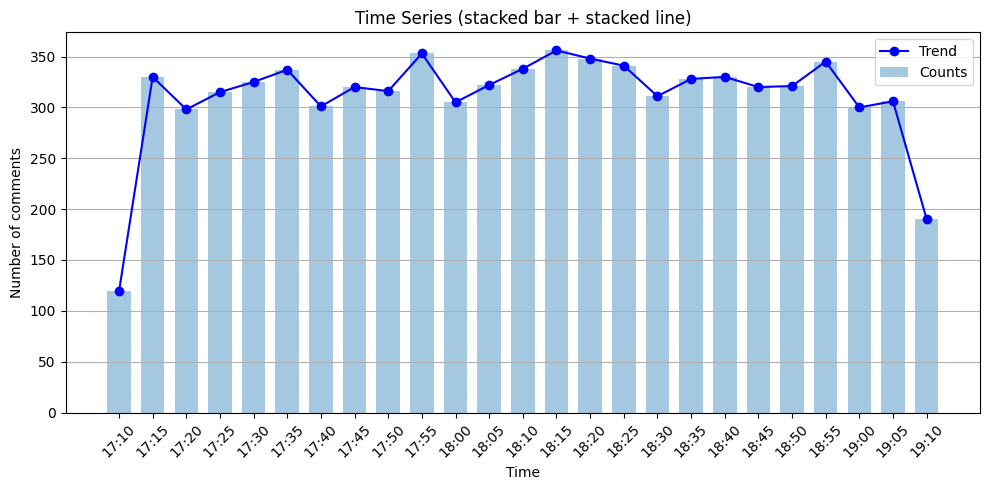

In [21]:
plot_utils.plot_time_series(reddit_df["datetime"], interval_minutes=5, figsize=(10,5), ylabel="Number of comments")

In [12]:
reddit_df.to_csv("reddit.csv", index=False)

### Step 03: Preprocessing

In [24]:
# if there are nan, replace with empty string
reddit_df.loc[reddit_df["text"].isna(), "text"] = ""

### Step 04: Sentiment Trend (NLTK + VADER)

In [15]:
reddit_df = pd.read_csv("reddit.csv")

In [17]:
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

In [26]:
reddit_df = sentiment_utils.apply_sentiment(reddit_df, "text")

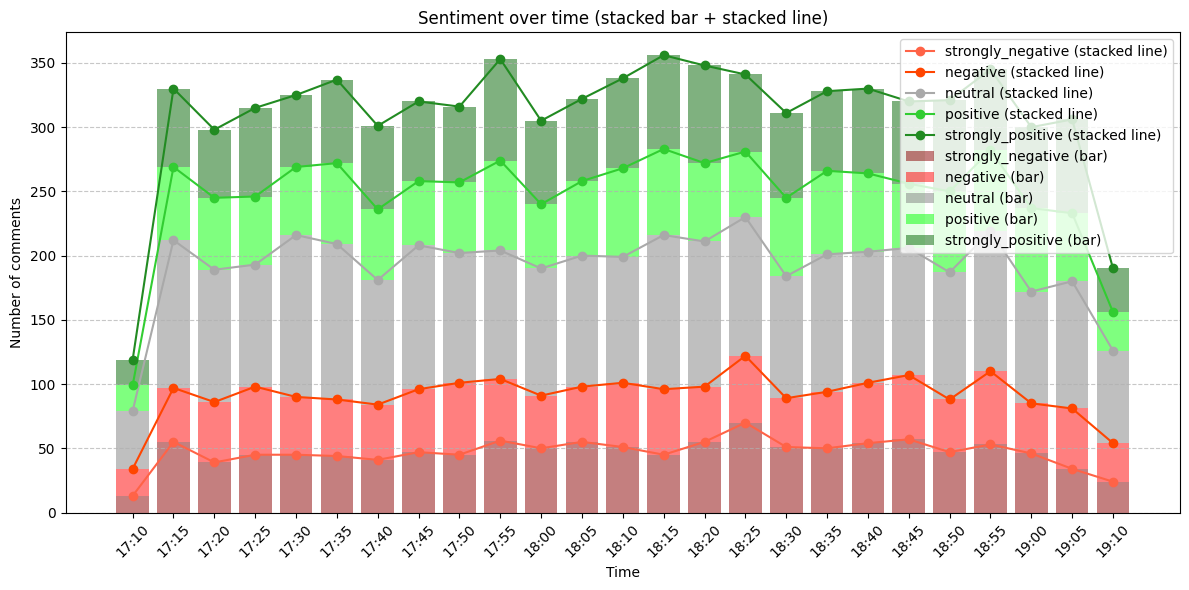

In [27]:
plot_utils.plot_sentiment_over_time(reddit_df, interval_minutes=5, figsize=(12,6), ylabel="Number of comments", has_legend=True)

### Step 05: Word Cloud Visualization

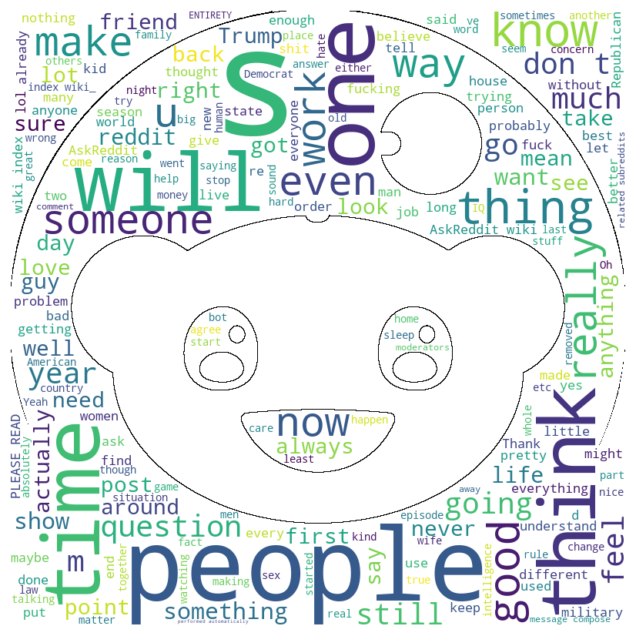

In [8]:
full_text = " ".join(reddit_df["text"])
url_pic = "https://redditinc.com/hs-fs/hubfs/Reddit%20Inc/Content/Brand%20Page/Reddit_Logo.png?width=800&height=800&name=Reddit_Logo.png"
plot_utils.plot_wordcloud(url_pic, full_text)